# 미니프로젝트 : 가위바위보 분류기를 만들자

## 1. 데이터 불러오기 + Resize 하기

#### PIL 라이브러리 불러오기

In [42]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 가위 - 이미지의 크기 28x28로 변경하기

In [43]:
import os

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1294  images to be resized.
1294  images resized.
가위 이미지 resize 완료!


#### 바위 - 이미지의 크기 28x28로 변경하기

In [44]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1405  images to be resized.
1405  images resized.
바위 이미지 resize 완료!


#### 보 - 이미지의 크기 28x28로 변경하기

In [87]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1408  images to be resized.
1408  images resized.
보 이미지 resize 완료!


#### 데이터읽기 및 라벨링

In [161]:
import numpy as np

def load_data(img_path, number_of_data=4107):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4107 입니다.
x_train shape: (4107, 28, 28, 3)
y_train shape: (4107,)


#### 이미지 불러오기 (x_train[0])

라벨:  0


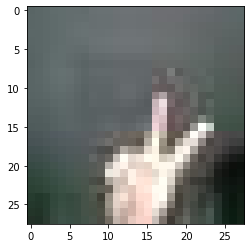

In [162]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [163]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

#### 모델 만들기

In [165]:

n_channel_1=256
n_channel_2=512
n_channel_3=512
n_dense=50
n_train_epoch=19

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
#model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()  


Model에 추가된 Layer 개수:  9
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 11, 11, 512)       1180160   
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 5, 5, 512)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_13 (Flatten)         

## 3. 딥러닝 네트워크 학습시키기

#### 채널수에 대한 정보를 넣기위해 reshape 해주기 => 기존에 채널 수에 대한 정보가 존재하므로 생략해도 상관없어보인다

In [166]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))


x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.


print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))



Before Reshape - x_train_norm shape: (4107, 28, 28, 3)
After Reshape - x_train_reshaped shape: (4107, 28, 28, 3)


#### x_train 학습데이터로 딥러닝 네트워크 학습시키기

In [167]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


#### 이미지 증강(Image Augmentation) :  알고리즘이 이미지의 불변하는 표현(invariant representation)을 학습하는 것

In [168]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rotation_range=10,shear_range=0.5, 
                             width_shift_range=0.10, height_shift_range=0.10, horizontal_flip=True)



model.fit_generator(datagen.flow(x_train_reshaped, y_train,batch_size=32),
                    steps_per_epoch=x_train_reshaped.shape[0]//32,epochs=n_train_epoch,
                   verbose=2)

Epoch 1/19
128/128 - 24s - loss: 1.0936 - accuracy: 0.3644
Epoch 2/19
128/128 - 3s - loss: 1.0056 - accuracy: 0.4685
Epoch 3/19
128/128 - 3s - loss: 0.8258 - accuracy: 0.6133
Epoch 4/19
128/128 - 3s - loss: 0.6767 - accuracy: 0.7077
Epoch 5/19
128/128 - 3s - loss: 0.5342 - accuracy: 0.7745
Epoch 6/19
128/128 - 3s - loss: 0.4359 - accuracy: 0.8270
Epoch 7/19
128/128 - 3s - loss: 0.3461 - accuracy: 0.8650
Epoch 8/19
128/128 - 3s - loss: 0.3272 - accuracy: 0.8670
Epoch 9/19
128/128 - 3s - loss: 0.2706 - accuracy: 0.8935
Epoch 10/19
128/128 - 3s - loss: 0.2549 - accuracy: 0.8989
Epoch 11/19
128/128 - 3s - loss: 0.2255 - accuracy: 0.9114
Epoch 12/19
128/128 - 3s - loss: 0.1937 - accuracy: 0.9244
Epoch 13/19
128/128 - 3s - loss: 0.1975 - accuracy: 0.9202
Epoch 14/19
128/128 - 3s - loss: 0.1931 - accuracy: 0.9261
Epoch 15/19
128/128 - 3s - loss: 0.1481 - accuracy: 0.9423
Epoch 16/19
128/128 - 3s - loss: 0.1432 - accuracy: 0.9416
Epoch 17/19
128/128 - 3s - loss: 0.1395 - accuracy: 0.9485
Epoch

## 4. 얼마나 잘 만들었지 확인하기

#### test셋으로 얼마나 잘 만들었는지 확인하기

#### test용 데이터 불러오기 + Resize 하기

In [170]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")


image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


def load_data(img_path, number_of_data=627):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

209  images to be resized.
209  images resized.
가위 이미지 resize 완료!
209  images to be resized.
209  images resized.
바위 이미지 resize 완료!
209  images to be resized.
209  images resized.
보 이미지 resize 완료!
테스트데이터(x_train)의 이미지 개수는 627 입니다.
x_test shape: (627, 28, 28, 3)
y_test shape: (627,)


#### 이미지 불러오기(x_test[58])

라벨:  0


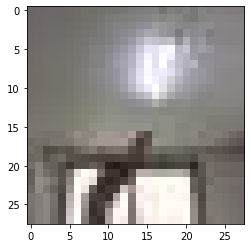

In [173]:
import matplotlib.pyplot as plt
plt.imshow(x_test[58])
print('라벨: ', y_test[58])

#### 훈련시킨 model을 사용하여 test_accuracy 측정하기

In [172]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

20/20 - 5s - loss: 2.4817 - accuracy: 0.6013
test_loss: 2.481746196746826 
test_accuracy: 0.6012759208679199


## <회고>